In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.mlab as mlab
from matplotlib.pyplot import cm 
import matplotlib.lines as mlines
from matplotlib import colors
import collections

# import seaborn.apionly as sns
# to import seaborn without bringing in styles

import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
# plt.rcParams['font.family']='serif'

import pandas as pd

In [2]:
##=========
##Bring in the arrays
##=========

csv = np.genfromtxt ('OptNIR_Final.csv', delimiter=",", dtype=str)
OPT_spectype = csv[1:,7]
NIR_spectype = csv[1:,22]
g_diff = csv[1:,23]

spex_bool = csv[1:,12]
SPEX_spectype = csv[1:,13]
SPEX_g_diff = csv[1:,24]

#make spex_bool into boolean
spex_bool = spex_bool.astype(int)
spex_bool = spex_bool == 0
spex_bool=np.logical_not(spex_bool)

print (g_diff)

['0' '1' '2' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '3' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '3' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '3' '0' '0' '0' '0' '0' '1' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '3' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '3' '0' '0' '0' '0' '3' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '3' '0' '0' '0' '0' '0']


In [18]:
# NIR_spectype_nog = []
# OPT_spectype_nog = []
# for ii in range(len(NIR_spectype)):
#     obj = NIR_spectype[ii]
#     obj2 = OPT_spectype[ii]
#     NIR_spectype_nog.append(int(obj[:2]))
#     OPT_spectype_nog.append(int(obj2[:2]))

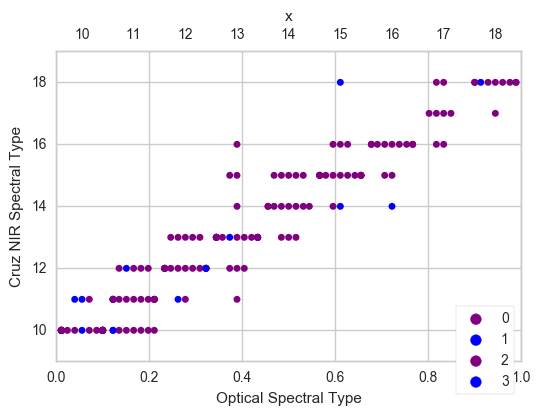

In [19]:
# #Original Plot
# df = pd.DataFrame({"x":OPT_spectype_nog,"y":NIR_spectype_nog} )

# fig, ax = plt.subplots()
# ax2 = ax.twiny()
# sns.swarmplot(x="x", y="y", data= df, hue=g_diff, palette=['purple', 'blue'], ax=ax2)
# # sns.regplot(y="y", x="x", data= df, color='grey', scatter_kws={"alpha" : 0.0},  ax=ax)
# ax2.grid(False)

# ax2.legend(bbox_to_anchor=(1, 0.2), frameon='True')
# ax.set_xlabel("Optical Spectral Type")
# ax.set_ylabel("Cruz NIR Spectral Type")

# sns.plt.show()

In [3]:
#Now plot for field objects with optical on x axis

#Create the index
field_index=[]
for ii in range(len(OPT_spectype)):
    obj=OPT_spectype[ii]
    if len(obj) == 2 or len(obj)== 3 or len(obj)==4:
        field_index.append(True)
    else :
        field_index.append(False)
field_index = np.array(field_index)


NIR_spectype_field = []
OPT_spectype_field = []
NIR_spectype_ed = NIR_spectype[field_index]
OPT_spectype_ed = OPT_spectype[field_index]
for ii in range(len(NIR_spectype_ed)):
    obj = NIR_spectype_ed[ii]
    obj2 = OPT_spectype_ed[ii]
    NIR_spectype_field.append(int(obj[:2]))
    OPT_spectype_field.append(int(obj2[:2]))
g_diff=g_diff[field_index]

NIR_spectype_field.append(19)
OPT_spectype_field.append(20)
np.append(g_diff, [g_diff[0], g_diff[0]])

print(g_diff)

['0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '3' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '3'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0']


//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1091: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  group_colors[self.plot_hues[i] == level] = hue_color
//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1091: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  group_colors[self.plot_hues[i] == level] = hue_color


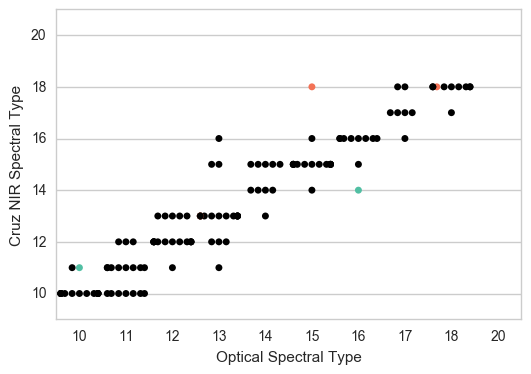

In [4]:
df = pd.DataFrame({"x":OPT_spectype_field,"y":NIR_spectype_field})

sns.swarmplot(x="x", y="y", data= df, hue=g_diff, palette=['k', '#F37256', '#51BFA3', '#7379BA'])

plt.legend().set_visible(False)
# plt.title("Optical Field Gravity Objects")
plt.ylim([9,21])
plt.xlabel("Optical Spectral Type")
plt.ylabel("Cruz NIR Spectral Type")
plt.savefig("opt_field_obj.pdf")

In [6]:
#Now plot with field gravity in optical vs. literature NIR

OPT_spectype = csv[1:,7]
NIR_spectype = csv[1:,22]
g_diff = csv[1:,23]

spex_bool = csv[1:,12]
SPEX_spectype = csv[1:,13]
SPEX_g_diff = csv[1:,24]

LIT_g_diff = csv[1:,25]

#make spex_bool into boolean
spex_bool = spex_bool.astype(int)
spex_bool = spex_bool == 0
spex_bool=np.logical_not(spex_bool)

#Make Everything correct length
OPT_spectype=OPT_spectype[spex_bool]
SPEX_spectype=SPEX_spectype[spex_bool]
LIT_g_diff=LIT_g_diff[spex_bool]

#Create the index
field_index=[]
for ii in range(len(OPT_spectype)):
    obj=OPT_spectype[ii]
    if len(obj) == 2 or len(obj)== 3 or len(obj)==4:
        field_index.append(True)
    else :
        field_index.append(False)
field_index = np.array(field_index)


SPEX_spectype_field = []
OPT_spectype_field = []
SPEX_spectype_ed = SPEX_spectype[field_index]
OPT_spectype_ed = OPT_spectype[field_index]
for ii in range(len(SPEX_spectype_ed)):
    obj = SPEX_spectype_ed[ii]
    obj2 = OPT_spectype_ed[ii]
    SPEX_spectype_field.append(int(obj[:2]))
    OPT_spectype_field.append(int(obj2[:2]))
LIT_g_diff=LIT_g_diff[field_index]

SPEX_spectype_field.append(19)
OPT_spectype_field.append(20)
np.append(LIT_g_diff, [LIT_g_diff[0], LIT_g_diff[0]])

array(['0', '0', '3', '3', '0', '0', '0', '0', '0', '0', '3', '0', '0',
       '3', '0', '0', '3', '0', '0', '3', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1',
       '1', '0', '0', '3', '0', '0', '0', '0'], 
      dtype='<U33')

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1091: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  group_colors[self.plot_hues[i] == level] = hue_color
//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1091: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  group_colors[self.plot_hues[i] == level] = hue_color


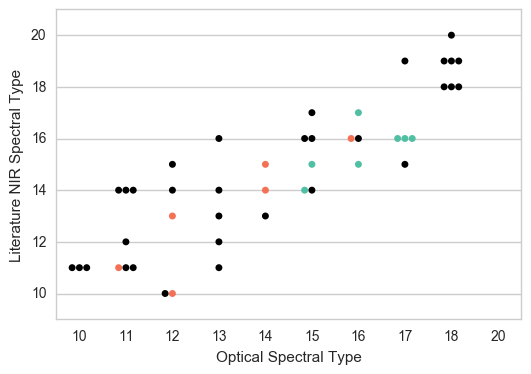

In [7]:
df = pd.DataFrame({"x":OPT_spectype_field,"y":SPEX_spectype_field})

sns.swarmplot(x="x", y="y", data= df, hue=LIT_g_diff, palette=['k', '#F37256', '#51BFA3', '#7379BA'])

plt.legend().set_visible(False)
plt.ylim([9,21])
plt.xlabel("Optical Spectral Type")
plt.ylabel("Literature NIR Spectral Type")
plt.savefig("lit_field_obj.pdf")

In [8]:
#now all with field gravity in optical vs. literature NIR

OPT_spectype = csv[1:,7]
NIR_spectype = csv[1:,22]
g_diff = csv[1:,23]

spex_bool = csv[1:,12]
SPEX_spectype = csv[1:,13]
SPEX_g_diff = csv[1:,24]

#make spex_bool into boolean
spex_bool = spex_bool.astype(int)
spex_bool = spex_bool == 0
spex_bool=np.logical_not(spex_bool)

#Make Everything correct length
NIR_spectype=OPT_spectype[spex_bool]
SPEX_spectype=SPEX_spectype[spex_bool]
SPEX_g_diff=SPEX_g_diff[spex_bool]

#Create the index
field_index=[]
for ii in range(len(SPEX_spectype)):
    obj=SPEX_spectype[ii]
    if len(obj) == 2 or len(obj)== 3 or len(obj)==4:
        field_index.append(True)
    else :
        field_index.append(False)
field_index = np.array(field_index)


SPEX_spectype_field = []
NIR_spectype_field = []
SPEX_spectype_ed = SPEX_spectype[field_index]
NIR_spectype_ed = NIR_spectype[field_index]
for ii in range(len(SPEX_spectype_ed)):
    obj = SPEX_spectype_ed[ii]
    obj2 = NIR_spectype_ed[ii]
    SPEX_spectype_field.append(int(obj[:2]))
    NIR_spectype_field.append(int(obj2[:2]))
SPEX_g_diff=SPEX_g_diff[field_index]

SPEX_spectype_field.append(19)
NIR_spectype_field.append(21)
np.append(SPEX_g_diff, [SPEX_g_diff[0], SPEX_g_diff[0]])

array(['0', '0', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '3', '1', '0', '0', '0', '0', '0', '0', '0', '1', '2', '0',
       '2', '0', '0', '3', '0', '3', '0', '3', '2', '0', '0', '0', '0',
       '1', '0', '3', '0', '0'], 
      dtype='<U33')

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1091: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4
  group_colors[self.plot_hues[i] == level] = hue_color
//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1346: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4
  swarm_data = group_data[hue_mask]
//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1351: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4
  point_colors = self.point_colors[i][hue_mask][sorter]


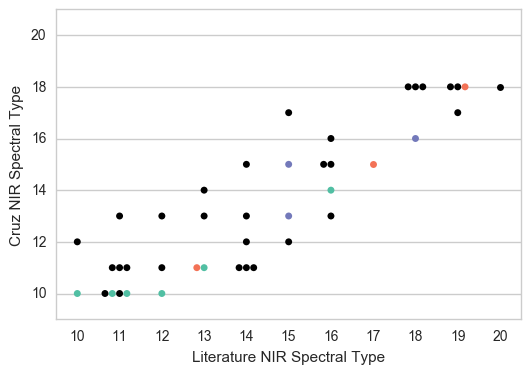

In [9]:
df = pd.DataFrame({"x":SPEX_spectype_field,"y":NIR_spectype_field})

sns.swarmplot(x="x", y="y", data= df, hue=SPEX_g_diff, palette=['k', '#F37256', '#7379BA', '#51BFA3'])

plt.legend().set_visible(False)
plt.ylim([9,21])
plt.xlabel("Literature NIR Spectral Type")
plt.ylabel("Cruz NIR Spectral Type")
plt.savefig("nir_field_obj.pdf")

In [10]:
#Now plot with field gravity in optical vs. literature NIR

OPT_spectype = csv[1:,7]
NIR_spectype = csv[1:,22]
g_diff = csv[1:,23]

spex_bool = csv[1:,12]
SPEX_spectype = csv[1:,13]
SPEX_g_diff = csv[1:,24]

LIT_g_diff = csv[1:,25]

#make spex_bool into boolean
spex_bool = spex_bool.astype(int)
spex_bool = spex_bool == 0
spex_bool=np.logical_not(spex_bool)

#Make Everything correct length
OPT_spectype=OPT_spectype[spex_bool]
SPEX_spectype=SPEX_spectype[spex_bool]
LIT_g_diff=LIT_g_diff[spex_bool]

#Create the index
field_index=[]
for ii in range(len(OPT_spectype)):
    obj=OPT_spectype[ii]
    if len(obj) == 2 or len(obj)== 3 or len(obj)==4:
        field_index.append(True)
    else :
        field_index.append(False)
field_index = np.array(field_index)


SPEX_spectype_field = []
OPT_spectype_field = []
SPEX_spectype_ed = SPEX_spectype[field_index]
OPT_spectype_ed = OPT_spectype[field_index]
for ii in range(len(SPEX_spectype_ed)):
    obj = SPEX_spectype_ed[ii]
    obj2 = OPT_spectype_ed[ii]
    SPEX_spectype_field.append(int(obj[:2]))
    OPT_spectype_field.append(int(obj2[:2]))
LIT_g_diff=LIT_g_diff[field_index]

SPEX_spectype_field.append(19)
OPT_spectype_field.append(20)
np.append(LIT_g_diff, [LIT_g_diff[0], LIT_g_diff[0]])

array(['0', '0', '3', '3', '0', '0', '0', '0', '0', '0', '3', '0', '0',
       '3', '0', '0', '3', '0', '0', '3', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1',
       '1', '0', '0', '3', '0', '0', '0', '0'], 
      dtype='<U33')

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1091: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4
  group_colors[self.plot_hues[i] == level] = hue_color
//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1346: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4
  swarm_data = group_data[hue_mask]
//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1351: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4
  point_colors = self.point_colors[i][hue_mask][sorter]


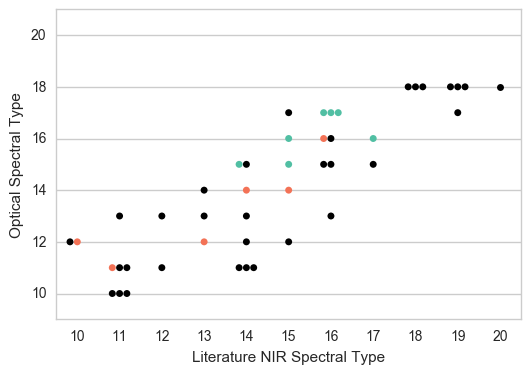

In [11]:
df = pd.DataFrame({"y":OPT_spectype_field,"x":SPEX_spectype_field})

sns.swarmplot(x="x", y="y", data= df, hue=LIT_g_diff, palette=['k', '#F37256', '#51BFA3', '#7379BA'])

plt.legend().set_visible(False)
plt.ylim([9,21])
plt.ylabel("Optical Spectral Type")
plt.xlabel("Literature NIR Spectral Type")
plt.savefig("reverse_lit_field_obj.pdf")